In [104]:
#create a confusion matrix
#making our confusion matrix preetier
import itertools
from sklearn.metrics import confusion_matrix

figsize=(10,10)

def make_confusion_matrix(y_true,y_pred,classes=None,figsize=(10,10),testsize=15):

  #create the confusion matrix
  cm = confusion_matrix(y_true,y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
  n_classes = cm.shape[0]

  #lets prettify it
  fig, ax = plt.subplots(figsize=figsize)

  #create a matrix plot
  cax = ax.matshow(cm,cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    label = classes
  else:
    labels= np.arange(cm.shape[0])

  #label the axis
  ax.set(title="Confusion Matrix", xlabel="predicted",ylabel="True")

  #set threshold for different colors
  threshold = (cm.max() * cm.min())/2



In [107]:
#import libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [108]:
import random, numpy as np, tensorflow as tf

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [109]:
train_dir = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/train",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)


Found 5216 files belonging to 2 classes.


In [110]:
val_dir = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/val",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 47 files belonging to 2 classes.


In [111]:
train_dir = tf.keras.preprocessing.image_dataset_from_directory(
    "../data/val",
    shuffle=True,
    image_size=(256, 256),
    batch_size=32
)

Found 47 files belonging to 2 classes.


In [112]:
class_names = train_dir.class_names
class_names

['NORMAL', 'PNEUMONIA']

In [113]:
len(train_dir)

2

In [114]:
163*32

5216

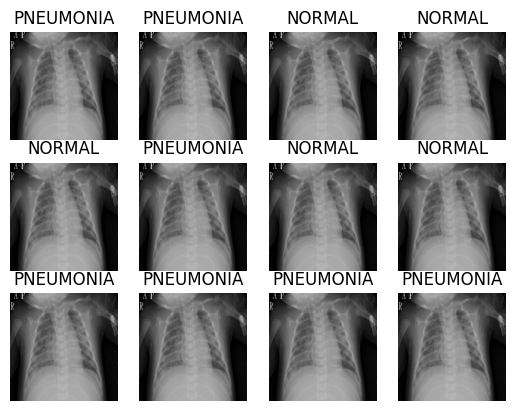

In [115]:
for image_batch,label_batch in train_dir.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [116]:
train_dir = train_dir.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dir = val_dir.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_dir = test_dir.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [117]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(256, 256),
    layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])


Prepare the model

In [131]:
tf.random.set_seed(42)
#create the model
model = models.Sequential([
    layers.Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(256,256,3)
           ),
        layers.Conv2D(100,3,activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(50,3,activation="relu"),
        layers.Conv2D(20,3,activation="relu"),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(1,activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(learning_rate=0.0002),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fir our cnn
history = model.fit(train_dir,
                        epochs=50,
                        steps_per_epoch=len(train_dir),
                        validation_data = val_dir,
                        validation_steps=len(val_dir),
                        callbacks=[lr_scheduler])


Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.5532 - loss: 9.0465 - val_accuracy: 0.5106 - val_loss: 12.7459 - learning_rate: 1.0000e-04
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5106 - loss: 10.5088 - val_accuracy: 0.4894 - val_loss: 3.5276 - learning_rate: 1.1220e-04
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4894 - loss: 4.2568 - val_accuracy: 0.5532 - val_loss: 1.9537 - learning_rate: 1.2589e-04
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.6170 - loss: 1.6855 - val_accuracy: 0.5106 - val_loss: 4.4923 - learning_rate: 1.4125e-04
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 5s/step - accuracy: 0.5106 - loss: 3.8872 - val_accuracy: 0.5745 - val_loss: 1.4045 - learning_rate: 1.5849e-04
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5532 - loss: 1.5522 - val_accuracy: 0.5106 - val_loss: 1.5423 - learning_rate: 1.7783e-04
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5957 - loss: 1.2119 - val_accu

In [119]:
model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_133 (Conv2D)                  │ (None, 254, 254, 10)        │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_134 (Conv2D)                  │ (None, 252, 252, 100)       │           9,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 126, 126, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_135 (Conv2D)                  │ (None, 124, 124, 50)        │          45,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_136 (Conv2D)                  │ (None, 122, 122, 20)        │           9,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 61, 61, 20)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_39 (Flatten)                 │ (None, 74420)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 1)                   │          74,421 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 413,615 (1.58 MB)

 Trainable params: 137,871 (538.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 275,744 (1.05 MB)

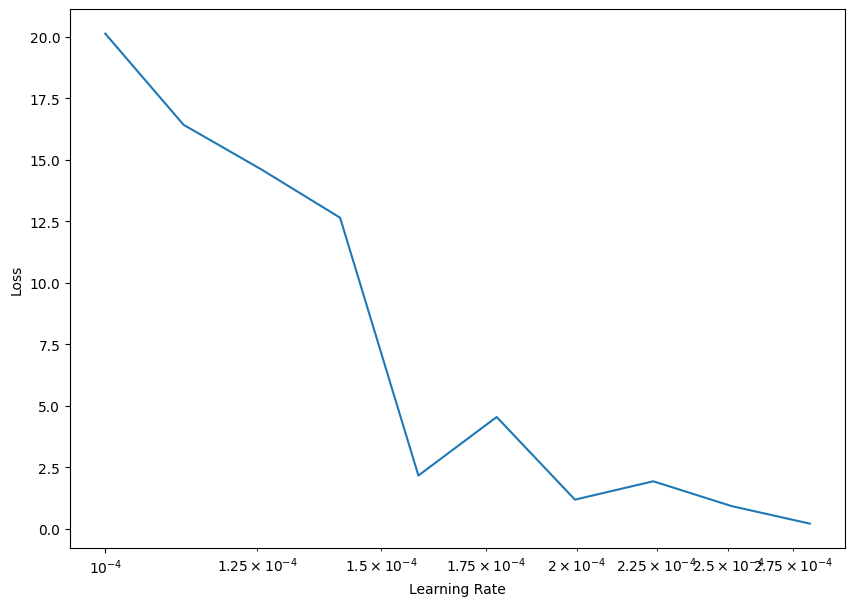

In [120]:
epochs = len(history.history["loss"])
lrs = 1e-4 * (10** (tf.range(epochs)/20))

plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.show()


In [121]:
##plot the history curve

In [122]:
##test some samples

In [123]:
model.evaluate(test_dir)

20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 833ms/step - accuracy: 0.4455 - loss: 3.0828


[3.0828306674957275, 0.4455128312110901]

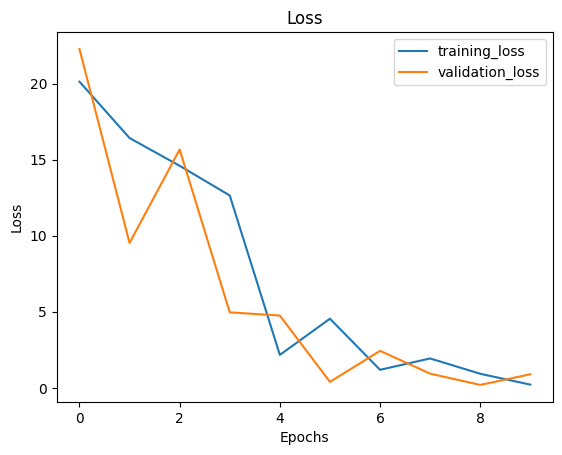

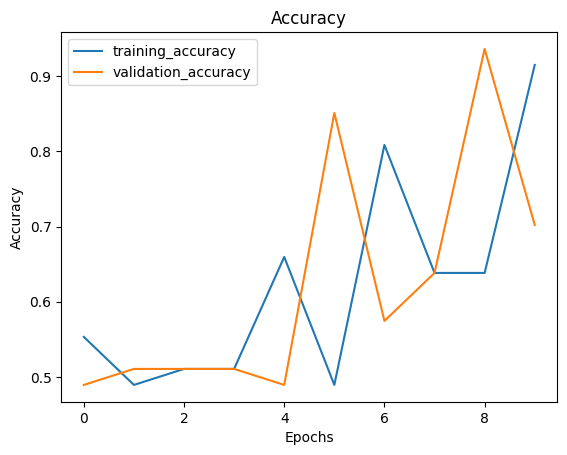

In [124]:
plot_loss_curves(history)

In [125]:
y_prob = model.predict(test_dir)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 959ms/step


In [126]:
test_dir.labels

AttributeError: '_PrefetchDataset' object has no attribute 'labels'